# __Размытия и пороговая фильтрация__

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
ORIG_PATH = './images/orig/'
NEW_PATH = './images/new/'

## __Размытия__

Фильтры размытия (smoothing filters) - это базовые операции в компьютерном зрении, которые:
- Уменьшают шум на изображениях
- Сглаживают текстуру
- Подготавливают изображение для дальнейшей обработки
- Уменьшают эффект "перегруженности" деталями

OpenCV предоставляет несколько типов размытия, среди которых два основных:
- __Простое размытие (Average blur)__
- __Гауссово размытие (Gaussian blur)__

__Функция в OpenCV:__

`cv2.blur(src, ksize[, dst[, anchor[, borderType]]]) → dst` - 

Параметры:
- `src`: входное изображение
- `ksize`: размер ядра размытия (ширина, высота) - должно быть нечетным (например, (3,3), (5,5))
- `anchor`: опорная точка ядра (по умолчанию (-1,-1) - центр)
- `borderType`: метод обработки границ

Чем больше размер ядра, тем сильнее эффект размытия:
- (3,3) - легкое размытие
- (7,7) - заметное размытие
- (15,15) - сильное размытие

__Пример:__

(np.float64(-0.5), np.float64(999.5), np.float64(667.5), np.float64(-0.5))

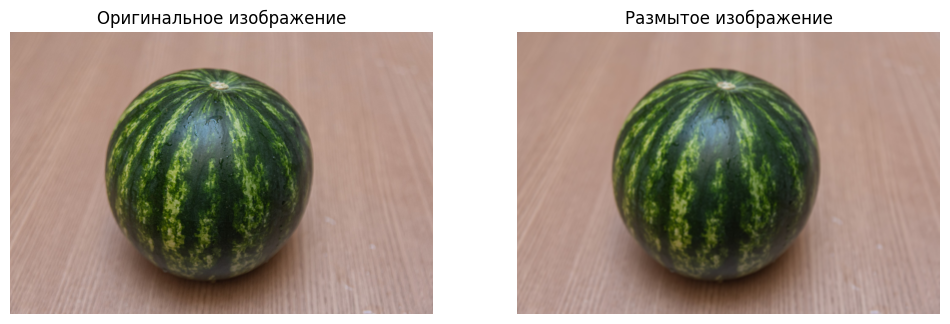

In [7]:
# Загрузка изображения
image = cv2.imread(ORIG_PATH + 'watermelon.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Применение простого размытия с ядром 5x5
blurred = cv2.blur(image, (5, 5))
blurred_rgb = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# Левый график (Оригинальное изображение)
ax[0].imshow(image_rgb)
ax[0].set_title('Оригинальное изображение')
ax[0].axis('off')  # Скрыть оси координат для первого изображения

# Правый график (Размытое изображение)
ax[1].imshow(blurred_rgb)
ax[1].set_title('Размытое изображение') # Добавим заголовок для ясности
ax[1].axis('off')  # <--- ВОТ ЧТО НУЖНО ДОБАВИТЬ: Скрыть оси координат для второго изображения


__Гауссово размытие (Gaussian blur)__

__Принцип работы:__ <br>

Использует гауссово распределение для вычисления весов соседних пикселей, придавая большее значение ближайшим пикселям.

__Функция в OpenCV:__ <br>

`cv2.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]) → dst` - 

Параметры:
- `src`: входное изображение
- `ksize`: размер ядра (ширина, высота) - должно быть нечетным и положительным
- `sigmaX`: стандартное отклонение по X (если 0 - вычисляется из ksize)
- `sigmaY`: стандартное отклонение по Y (если 0 - равно sigmaX)
- `borderType`: метод обработки границ


__Пример:__

(np.float64(-0.5), np.float64(999.5), np.float64(667.5), np.float64(-0.5))

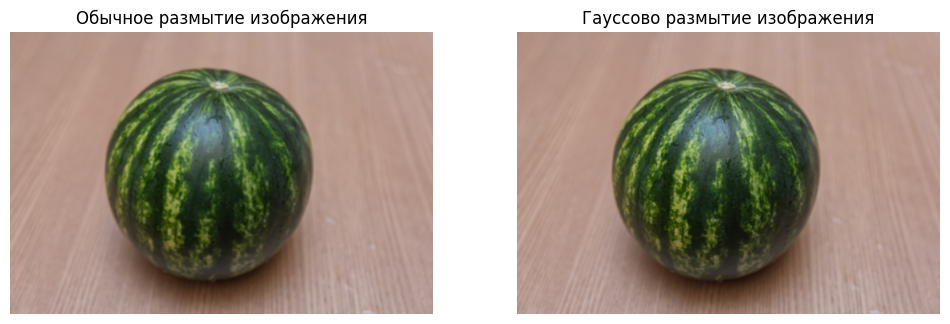

In [9]:
# Применение гауссова размытия с ядром 5x5
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
gaussian_blur_rgb = cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# Левый график (Обычное размытие)
ax[0].imshow(blurred_rgb)
ax[0].set_title('Обычное размытие изображения')
ax[0].axis('off')  # Скрыть оси координат для первого изображения

# Правый график (Гауссово размытие)
ax[1].imshow(gaussian_blur_rgb)
ax[1].set_title('Гауссово размытие изображения') # Добавим заголовок для ясности
ax[1].axis('off')  # <--- ВОТ ЧТО НУЖНО ДОБАВИТЬ: Скрыть оси координат для второго изображения


Более естественное размытие по сравнению с average blur. Сохраняет лучше границы объектов. Часто используется перед операциями выделения границ (например, Canny edge detection)

__Сравнение__

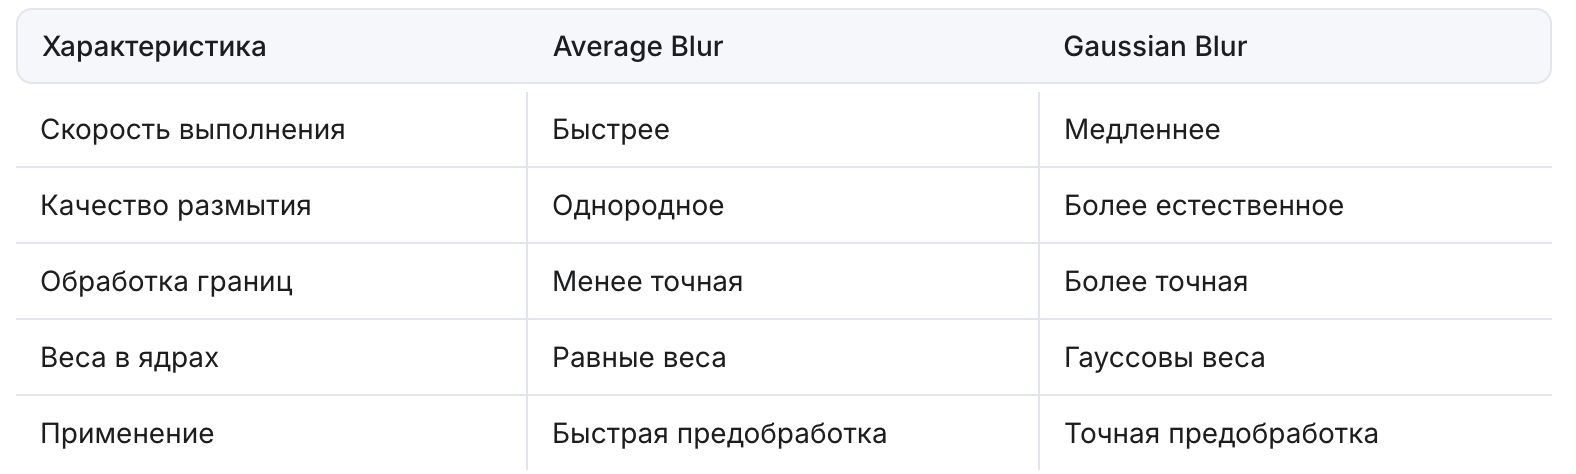

## __Простая пороговая фильтрация__

Пороговая фильтрация — один из самых простых и важных методов сегментации изображения.
Она преобразует градации серого в двухуровневое изображение (0 и 255), отделяя объект от фона.

В компьютерном зрении пороговая фильтрация используется для:
- выделения объектов,
- подготовки масок,
- распознавания текста,
- последующей морфологии,
- упрощения анализа контуров.

Перед пороговой фильтрацией изображение нужно переводить в оттенки серого: <br>

`gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)`

Простая пороговая фильтрация реализована функцией cv2.threshold:

`cv2.threshold(gray, thresh, max_value, thresh_type)`

- `gray` - изображение в оттенках серого
- `thresh` - значение порога
- `max_value` - максимальное значение назначаемое выше порога
- `thresh_type` - тип порога (выбирается из констант)


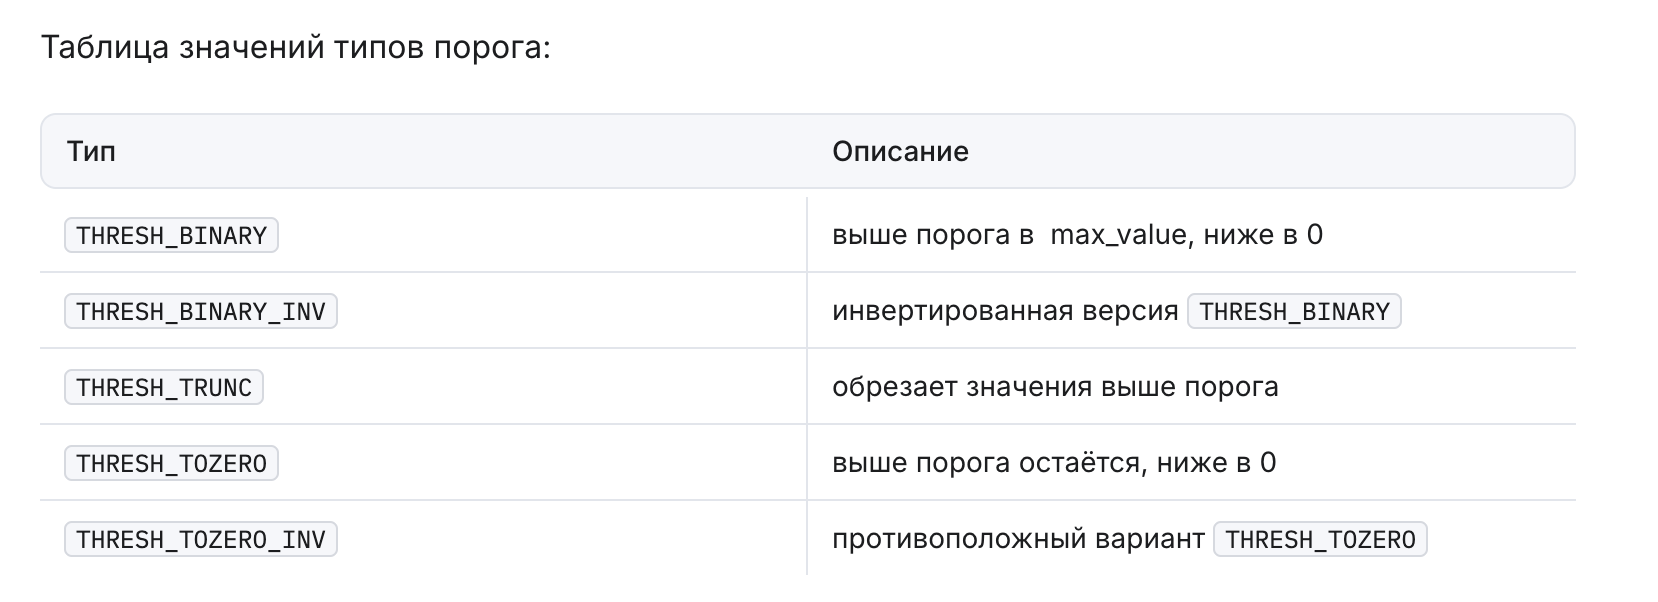

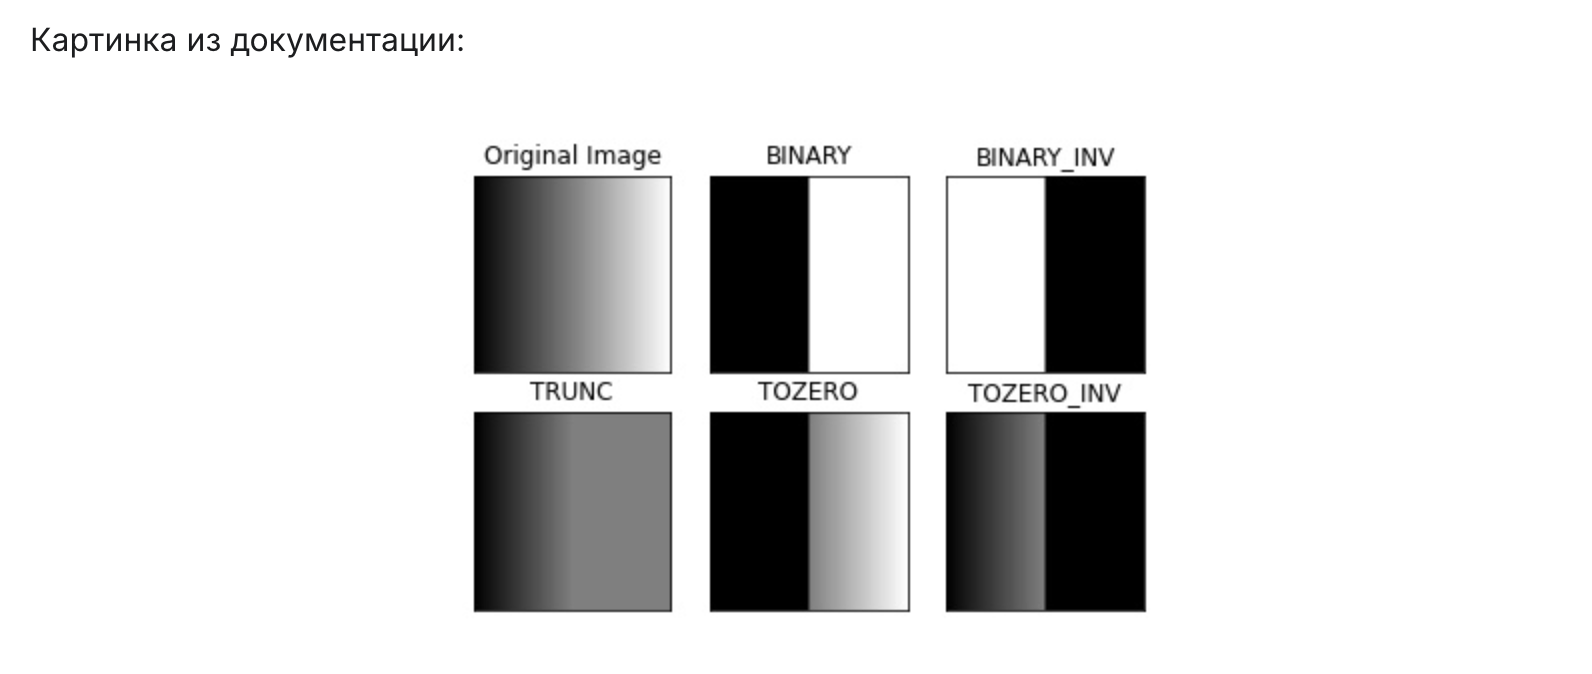

## __Адаптивная пороговая фильтрация__

Простой порог хорошо работает, только для равномерно освещенных изображений .
Однако если яркость меняется, то ручной выбор значений становится  нестабилен.



__Метод Отсу (Otsu Thresholding):__ 

Метод Отсу автоматически вычисляет оптимальный порог, разделяя изображение на два класса: фон и объект.  Работает, когда гистограмма имеет две выраженные моды.

`cv2.threshold(gray_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)`

__Адаптивная пороговая фильтрация__

Адаптивные методы вычисляют порог для каждой локальной области изображения. Они принимают на 3 аргумента больше

`cv2.adaptiveThreshold(gray, max_value, adaptive_method, threshold_type, block_size, C)`

- `gray` - изображение в оттенках серого
- `max_value` - максимальное значение назначаемое выше порога
- `adaptive_method` - адаптивный метод (выбирается из констант cv2.ADAPTIVE_THRESH_MEAN_C, cv2.ADAPTIVE_THRESH_GAUSSIAN_C)
- `threshold_type` - тип порога (выбирается из констант)
- `block_size` - размер окна (квадратного), должно быть нечетным
- `C` - постоянное смещение после адаптивного метода 

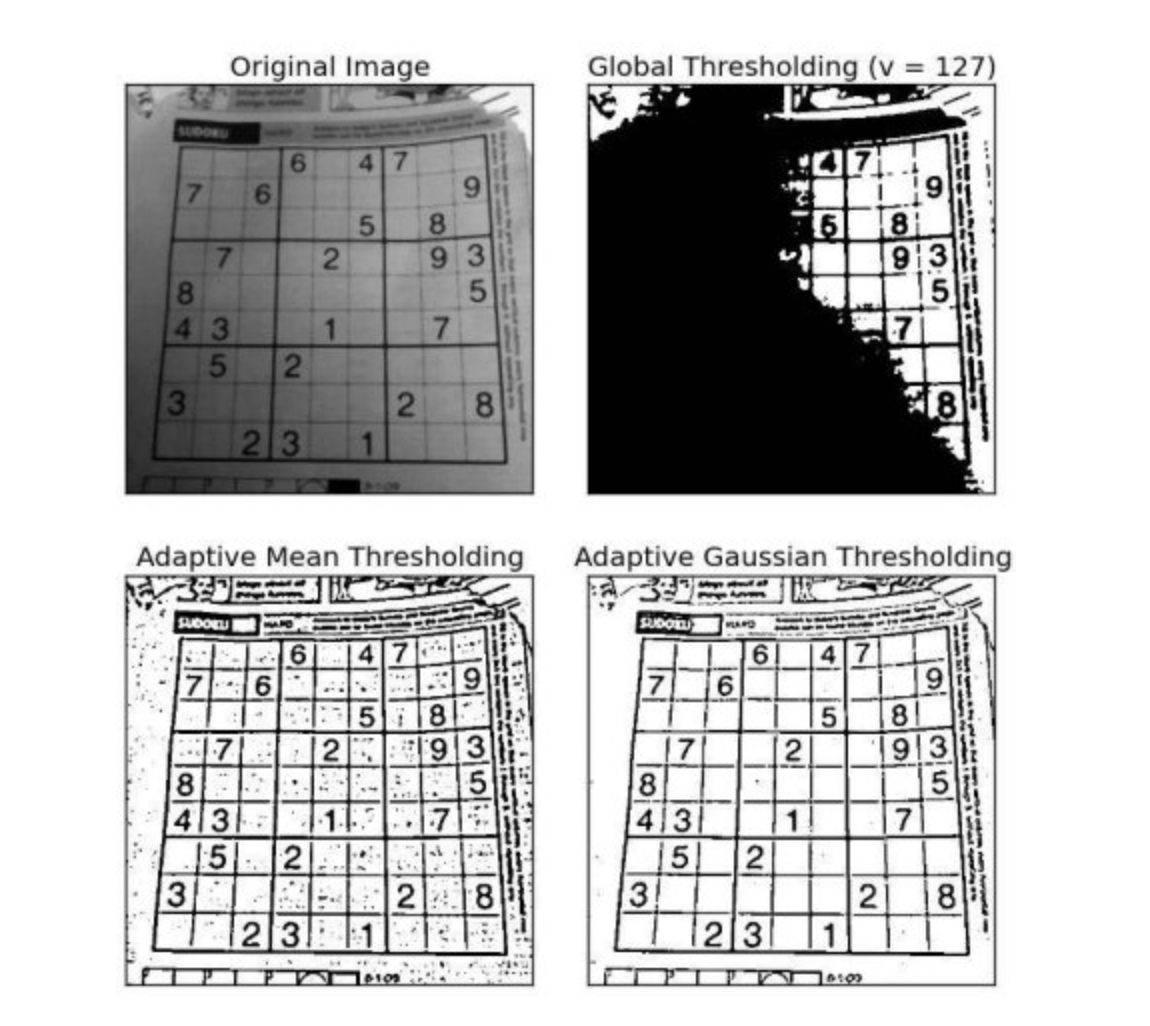

In [ ]:
def show_images(images, nrows, ncols):
    fig, ax = plt.subplots(nrows, ncols, figsize=(ncols * 5, nrows * 5))
    if len(images) == 1:
        ax = [ax]  # Ensure ax is iterable
    
    for i in range(nrows):
        for j in range(ncols):
            index = i * 2 + j
            if index < num_images:
                ax[i][j].imshow(cv2.cvtColor(images[index], cv2.COLOR_BGR2RGB))
                ax[i][j].axis('off')
            else:
                ax[i][j].axis('off')

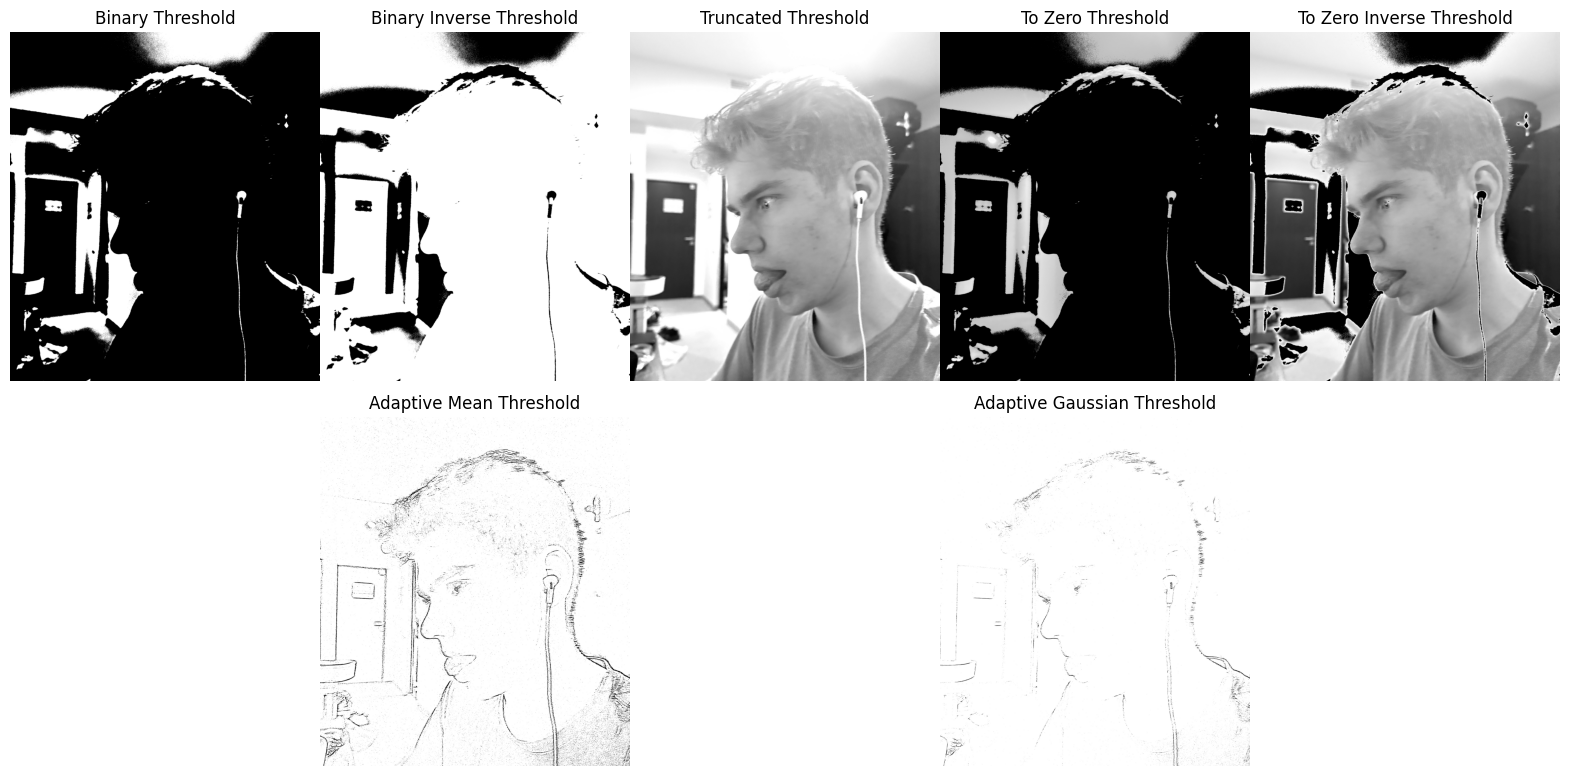

In [7]:
TRESH = 140
MAX_VAL = 255

airpods = cv2.imread(ORIG_PATH + 'egor.jpg')
airpods_gray = cv2.cvtColor(airpods, cv2.COLOR_BGR2GRAY)
airpods_blured = cv2.GaussianBlur(airpods_gray, (7, 7), 0)

thresh_bin = cv2.threshold(airpods_gray, TRESH, MAX_VAL, cv2.THRESH_BINARY)[1]
thresh_bin_inv = cv2.threshold(airpods_gray, TRESH, MAX_VAL, cv2.THRESH_BINARY_INV)[1]
thresh_trunc = cv2.threshold(airpods_gray, TRESH, MAX_VAL, cv2.THRESH_TRUNC)[1]
thresh_tozero = cv2.threshold(airpods_gray, TRESH, MAX_VAL, cv2.THRESH_TOZERO)[1]
thresh_tozero_inv = cv2.threshold(airpods_gray, TRESH, MAX_VAL, cv2.THRESH_TOZERO_INV)[1]

thresh_adaptive_mean = cv2.adaptiveThreshold(airpods_blured, MAX_VAL, cv2.ADAPTIVE_THRESH_MEAN_C,
                                             cv2.THRESH_BINARY, 11, 2)
thresh_adaptive_gauss = cv2.adaptiveThreshold(airpods_blured, MAX_VAL, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                              cv2.THRESH_BINARY, 11, 2)

images = [
    thresh_bin, thresh_bin_inv, 
    thresh_trunc, thresh_tozero, 
    thresh_tozero_inv, thresh_adaptive_mean, 
    thresh_adaptive_gauss
]

titles = [
    'Binary Threshold', 'Binary Inverse Threshold', 
    'Truncated Threshold', 'To Zero Threshold', 
    'To Zero Inverse Threshold', 'Adaptive Mean Threshold',
    'Adaptive Gaussian Threshold'
]

fig, ax = plt.subplots(2, 5, figsize=(20, 10))


for j in range(5):
    ax[0, j].imshow(images[j], cmap='gray')
    ax[0, j].set_title(titles[j])
    ax[0, j].axis('off')

ax[1, 1].imshow(thresh_adaptive_mean, cmap='gray')
ax[1, 1].set_title('Adaptive Mean Threshold')
ax[1, 1].axis('off')

ax[1, 3].imshow(thresh_adaptive_gauss, cmap='gray')
ax[1, 3].set_title('Adaptive Gaussian Threshold')
ax[1, 3].axis('off')

fig.delaxes(ax[1, 0])
fig.delaxes(ax[1, 2])
fig.delaxes(ax[1, 4])

plt.subplots_adjust(wspace=0.0, hspace=0.0)

plt.show()

In [55]:
def H(x, y, l1):
    return -8 * (x**2 - x*y + l1 * y**2 + l1 * x**2)

print(
    H(1, 1, -1/2),
    H(-1, 1, 1/2),
    H(-(1 + 3**0.5)/2, (3**0.5 - 1)/2, (3**0.5 - 2)/2)
)

8.0 -24.0 -16.784609690826525
